## Analiza exploratorie a datelor cu Pandas


**În această sarcină trebuie să folosești Pandas pentru a răspunde la câteva întrebări despre datasetul [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). (Nu trebuie să descărcați datele - sunt deja aici). **

Valori unice ale tuturor caracteristicilor (pentru mai multe informații, consultați linkul de mai sus):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [32]:
!mkdir data && curl -o data/adult.data.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson03/notebooks/data/adult.data.csv

mkdir: cannot create directory ‘data’: File exists


In [33]:
import pandas as pd
data = pd.read_csv('data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Câți bărbați și câte femei (caracteristica *sex*) sunt reprezentați în acest set de date?** 

In [ ]:
data["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Care este vârsta medie (caracteristica *age*) a femeilor?**

In [ ]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Care este procentul de cetățeni germani (caracteristica *native-country*)?**

In [ ]:
data["native-country"].apply(lambda state : "Germans" if state == 'Germany' else "Other nations").value_counts(normalize=True)*100

Other nations    99.579251
Germans           0.420749
Name: native-country, dtype: float64

**4-5. Care sunt media și abaterea standard (standard deviation) a vârstei pentru cei care câștigă mai mult de 50 000 de euro pe an (caracteristica *salary*) și pentru cei care câștigă mai puțin de 50 000 de euro pe an?**

In [ ]:
import numpy as np

data.groupby(["salary"])["age"].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Este adevărat că toate persoanele care câștigă mai mult de 50.000 de dolari au studii universitare? (*education -  Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* sau *Doctorate*)**

In [ ]:
data[data["salary"] == '>50K']["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]).value_counts(normalize=True)

True     0.57837
False    0.42163
Name: education, dtype: float64

**7. Afișați statisticile privind vârsta pentru fiecare rasă (caracteristica *race*) și pentru fiecare sex (caracteristica *sex*). Utilizați *groupby()* și *describe()*. Găsiți vârsta maximă a bărbaților de rasă *Amer-Indian-Eskimo*.**

In [ ]:
#Statistics
data.groupby(["race", "sex"])["age"].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [ ]:
#Max age
data[(data["race"] == "Amer-Indian-Eskimo") & (data["sex"] == 'Male')]["age"].max()

82

**8. În rândul cui este mai mare proporția celor care câștigă mult (>50.000): bărbați căsătoriți sau necăsătoriți (caracteristica *marital-status*)? Considerați ca fiind căsătoriți pe cei care au un *marital-status* care începe cu *Married* (Married-civ-spouse, Married-spouse-absent sau Married-AF-spouse), restul sunt considerați necasatoriti.**



In [ ]:
#Proportion for married is bigger
data["marital-status"].groupby(data["marital-status"].apply(lambda status: "Married" if "Married" in status else "Not-Married")[data["salary"] == '>50K']).describe()

,count,unique,top,freq
marital-status,,,,
Married,6736,3,Married-civ-spouse,6692
Not-Married,1105,4,Never-married,491


**9. Care este numărul maxim de ore pe săptămână pe care o persoană le lucrează (caracteristica *hours-per-week*)? Câte persoane lucrează un astfel de număr de ore și care este procentul celor care câștigă mult (>50K) dintre acestea?**



In [ ]:
# #Question 1:
data["hours-per-week"].max()

#Question 2:
data[data["hours-per-week"] == data["hours-per-week"].max()]["hours-per-week"].count()

#Question 3:
data[(data["hours-per-week"] == data["hours-per-week"].max())].groupby(["salary"])["salary"].count()

salary
<=50K    60
>50K     25
Name: salary, dtype: int64

**10. Calculați timpul mediu de lucru (*hours-per-week*) pentru cei care câștigă puțin (<=50K) și mult (>50K) (*salariu*) pentru fiecare țară (*native-country*). Care vor fi acestea pentru Japonia?**



In [ ]:
#for all countries
data.groupby(["native-country", "salary"])["hours-per-week"].agg(np.mean) 

native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64

In [ ]:
#for Japan only
data[data["native-country"] == "Japan"].groupby(["salary"])["hours-per-week"].agg(np.mean)

salary
<=50K    41.000000
>50K     47.958333
Name: hours-per-week, dtype: float64

## Vizualizarea datelor


**Afiseaza diagrama de histograme pentru caracteristica fnlwgt cu ajutorul metodei .hist() a dataframe-ului. Exploreaza diferite grafice pasand functiei .hist() parametrul bins (e.g. chemam .hist(bins=6))**


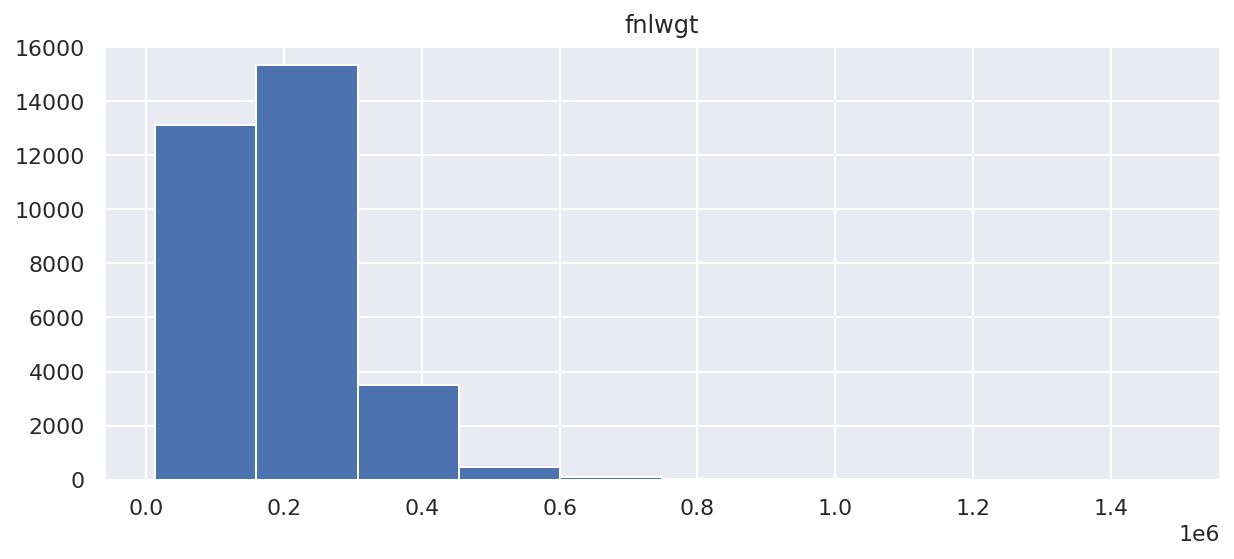

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'retina'

features = ["fnlwgt"]
data[features].hist(bins=10, figsize=(10, 4));

**Afiseaza diagrama de densitate pentru caracteristica capital-gain cu ajutorul metodei .plot() a dataframe-ului.**

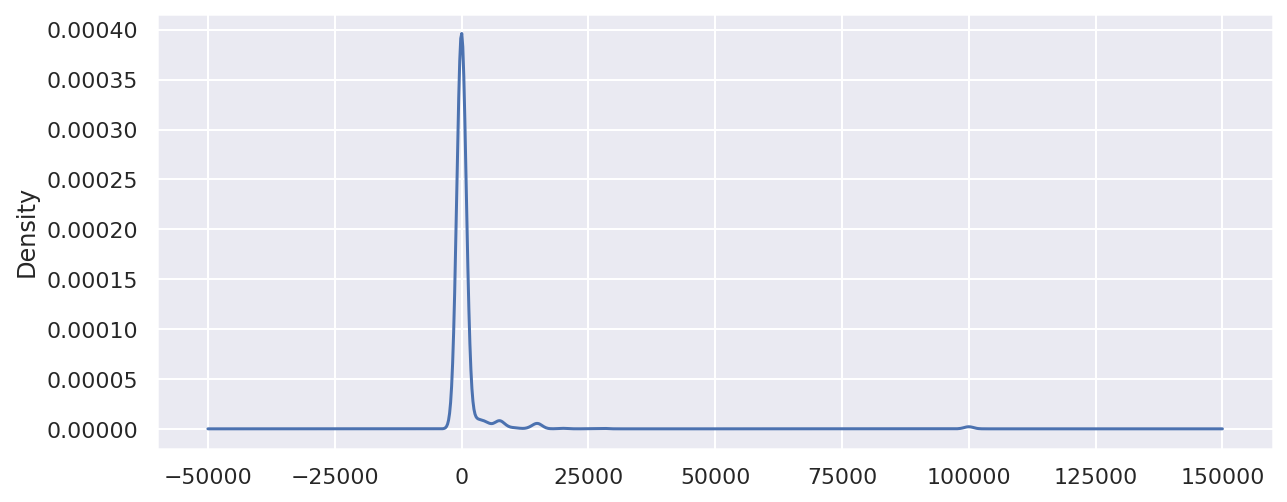

In [ ]:
data["capital-gain"].plot(
    kind="density", layout=(1, 2), figsize=(10, 4)
);

**Afiseaza diagrama box-plot pentru caracteristica hours-per-week cu ajutorul librariei seaborn (importata cu denumirea sns).**

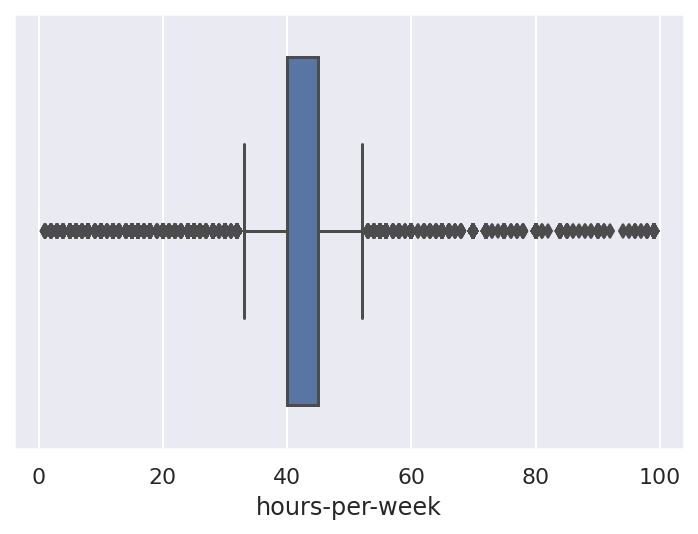

In [ ]:
import seaborn as sns

sns.boxplot(x=data["hours-per-week"])

**Ce putem conclude despre caracteristica hours-per-week? Dublu click pe aceasta celula si scrie textul tau aici.**

*Afiseaza diagrama de bare (bar plot) pentru caracteristicile *salary, marital-status si relationship. Foloseste libraria matplotlib (importata cu numele plt). **


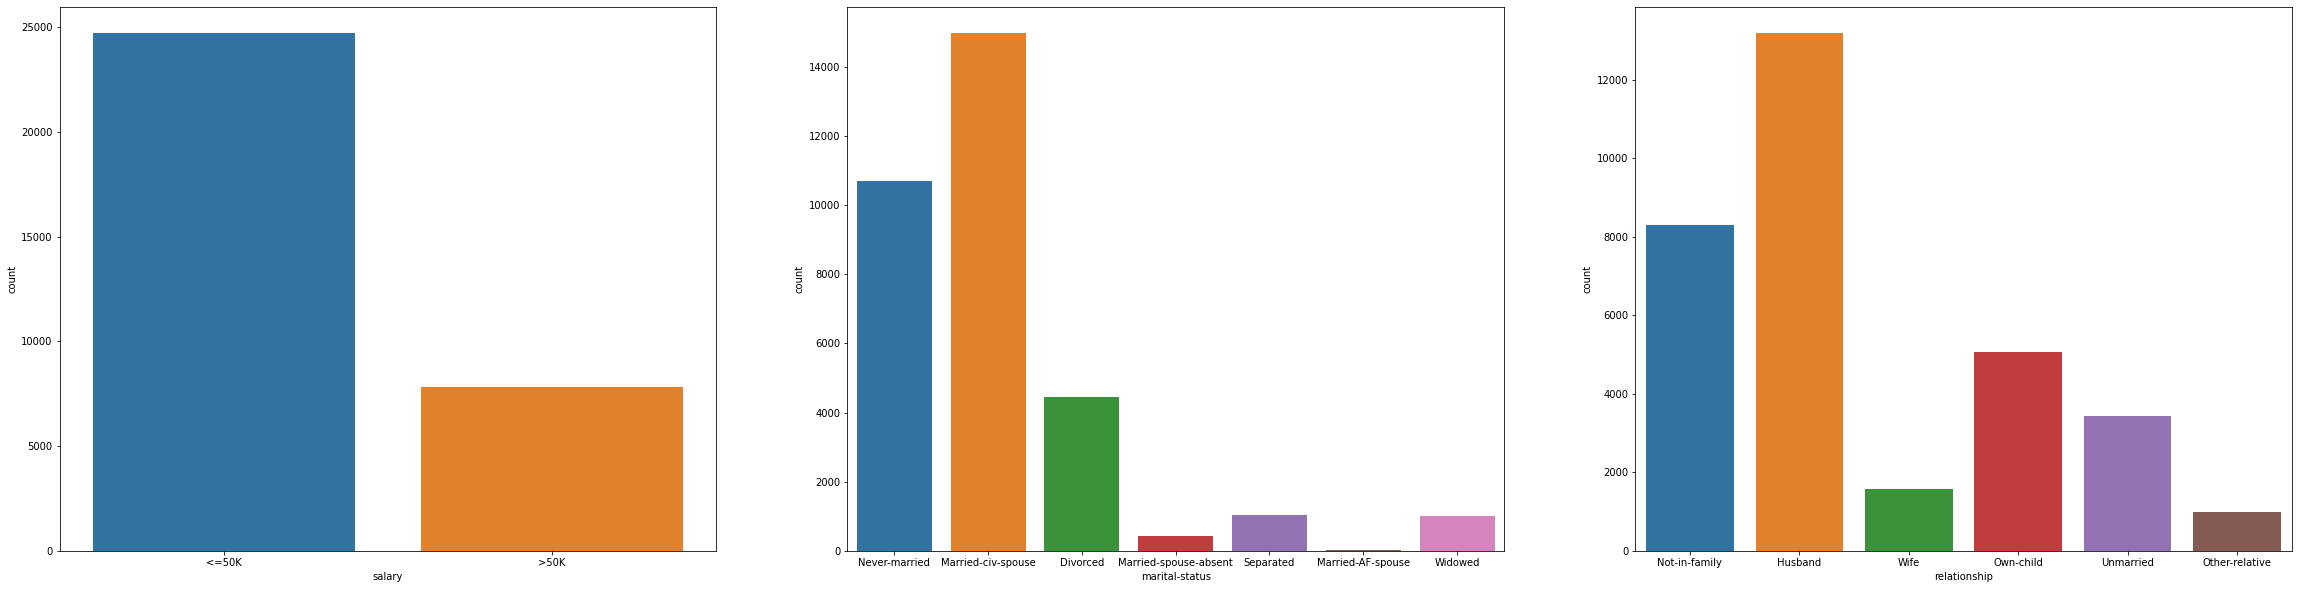

In [42]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))

sns.countplot(x="salary", data=data, ax=axes[0])
sns.countplot(x="marital-status", data=data, ax=axes[1])
sns.countplot(x="relationship", data=data, ax=axes[2]);

**Afiseaza matricea de corelatie intre caracteristicile numerice. Calculeaza matricea de colelatie cu ajutorul functiei corr() a dataframe-ului si afiseaza graficul cu ajutorul functiei heatmap() a librariei sns.**

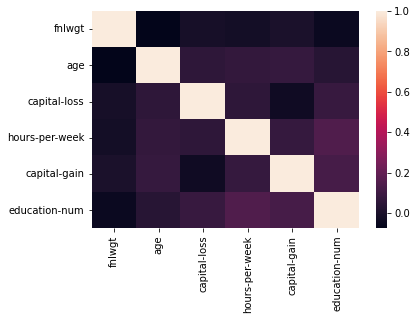

In [ ]:
# Only numerical features are included
import seaborn as sns

numerical = ["fnlwgt", "age", "capital-loss", "hours-per-week", "capital-gain", "education-num"]

# Calculate and plot
corr_matrix = data[numerical].corr();
sns.heatmap(corr_matrix);